<a href="https://colab.research.google.com/github/18430349/Waste-Generation/blob/main/HARZARDOUS_WASTE_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Hazardous waste per capita-Global Analysis.csv to Hazardous waste per capita-Global Analysis.csv


In [ ]:
df = pd.read_csv("Hazardous waste per capita-Global Analysis.csv")
df

,Entity,Code,Year,"12.4.2 - Hazardous waste generated, per capita (Kg) - EN_HAZ_PCAP"
0,Algeria,DZA,2003,10.14
1,Algeria,DZA,2007,9.57
2,Andorra,AND,2013,13.68
3,Andorra,AND,2014,29.06
4,Andorra,AND,2015,24.92
...,...,...,...,...
959,Uzbekistan,UZB,2020,2.77
960,Uzbekistan,UZB,2021,2.75
961,Zambia,ZMB,2000,5.06
962,Zambia,ZMB,2003,4.96


In [ ]:
df.drop(df.columns[[1]], axis=1, inplace =True)
df

,Entity,Year,"12.4.2 - Hazardous waste generated, per capita (Kg) - EN_HAZ_PCAP"
0,Algeria,2003,10.14
1,Algeria,2007,9.57
2,Andorra,2013,13.68
3,Andorra,2014,29.06
4,Andorra,2015,24.92
...,...,...,...
959,Uzbekistan,2020,2.77
960,Uzbekistan,2021,2.75
961,Zambia,2000,5.06
962,Zambia,2003,4.96


In [ ]:
df.rename(columns={'Entity':'Countries','12.4.2 - Hazardous waste generated, per capita (Kg) - EN_HAZ_PCAP':'Waste per capita'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Countries         964 non-null    object 
 1   Year              964 non-null    int64  
 2   Waste per capita  964 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 22.7+ KB


In [ ]:
duplicates = df[df.duplicated()]
print("Duplicate data:")
print(duplicates)

Duplicate data:
Empty DataFrame
Columns: [Countries, Year, Waste per capita]
Index: []


In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Countries           0
Year                0
Waste per capita    0
dtype: int64


In [ ]:
# Calculate global average waste per capita
global_average = df['Waste per capita'].mean()

# Calculate standard error of the mean
standard_error = df['Waste per capita'].sem()

# Calculate degrees of freedom
degrees_of_freedom = len(df) - 1

# Calculate t-score for 95% confidence interval
t_score = stats.t.ppf(0.975, df=degrees_of_freedom)

# Calculate margin of error
margin_of_error = t_score * standard_error

# Calculate confidence interval
confidence_interval = (global_average - margin_of_error, global_average + margin_of_error)

# Calculate confidence level
confidence_level = 0.95

# Output results
print("Global Average Waste per capita:", global_average)
print("Standard Error of the Mean:", standard_error)
print("Degrees of Freedom:", degrees_of_freedom)
print("t-score for 95% Confidence Interval:", t_score)
print("Margin of Error:", margin_of_error)
print("95% Confidence Interval:", confidence_interval)
print("Confidence Level:", confidence_level)


Global Average Waste per capita: 602.9545954356846
Standard Error of the Mean: 139.27211069707252
Degrees of Freedom: 963
t-score for 95% Confidence Interval: 1.9624304486435087
Margin of Error: 273.3118306787844
95% Confidence Interval: (329.6427647569002, 876.266426114469)
Confidence Level: 0.95


In [ ]:
from sklearn.preprocessing import StandardScaler

column_to_standardize = df[['Waste per capita']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
column_standardized = scaler.fit_transform(column_to_standardize)

# Replace the original column with the standardized values
df['Waste per capita'] = column_standardized

# Print the DataFrame with the standardized values
print(df)


      Countries  Year  Waste per capita
0       Algeria  2003         -0.137164
1       Algeria  2007         -0.137296
2       Andorra  2013         -0.136345
3       Andorra  2014         -0.132787
4       Andorra  2015         -0.133745
..          ...   ...               ...
959  Uzbekistan  2020         -0.138870
960  Uzbekistan  2021         -0.138874
961      Zambia  2000         -0.138340
962      Zambia  2003         -0.138363
963      Zambia  2005         -0.137909

[964 rows x 3 columns]


# New Cleaned Data

In [ ]:
df.to_csv('Cleaned-hazardous-waste-per-capita.csv', index=False)
files.download('Cleaned-hazardous-waste-per-capita.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

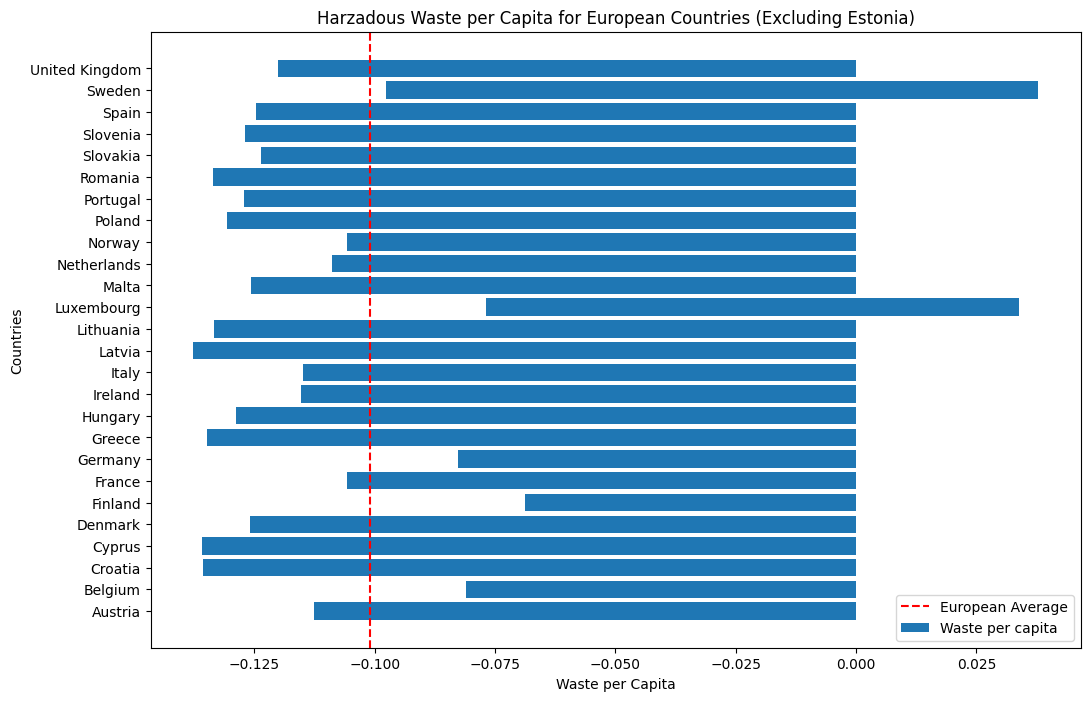

In [ ]:
# Filter DataFrame for European countries
european_countries = ['Germany', 'France', 'Italy', 'Spain', 'United Kingdom', 'Netherlands', 'Belgium', 'Switzerland', 'Sweden', 'Austria', 'Norway', 'Denmark', 'Finland', 'Greece', 'Portugal', 'Ireland', 'Poland', 'Romania', 'Czech Republic', 'Hungary', 'Slovakia', 'Croatia', 'Slovenia', 'Lithuania', 'Latvia', 'Cyprus', 'Luxembourg', 'Malta'] # Removed Estonia
df_europe = df[df['Countries'].isin(european_countries)]

# Calculate average waste generated per capita across all European countries
average_waste_per_capita = df_europe['Waste per capita'].mean()

# Plot clustered bar chart
plt.figure(figsize=(12, 8))
plt.barh(df_europe['Countries'], df_europe['Waste per capita'], label='Waste per capita')
plt.axvline(x=average_waste_per_capita, color='r', linestyle='--', label='European Average')
plt.title('Harzadous Waste per Capita for European Countries (Excluding Estonia)')
plt.xlabel('Waste per Capita')
plt.ylabel('Countries')
plt.legend()
plt.show()


In [ ]:
# Calculate global average waste per capita
global_average = df['Waste per capita'].mean()

# Calculate standard error of the mean
standard_error = df['Waste per capita'].sem()

# Calculate degrees of freedom
degrees_of_freedom = len(df) - 1

# Calculate t-score for 95% confidence interval
t_score = stats.t.ppf(0.975, df=degrees_of_freedom)

# Calculate margin of error
margin_of_error = t_score * standard_error

# Calculate confidence interval
confidence_interval = (global_average - margin_of_error, global_average + margin_of_error)

# Calculate confidence level
confidence_level = 0.95

# Printing the Output results
print("Global Average Waste per capita:", global_average)
print("Standard Error of the Mean:", standard_error)
print("Degrees of Freedom:", degrees_of_freedom)
print("t-score for 95% Confidence Interval:", t_score)
print("Margin of Error:", margin_of_error)
print("95% Confidence Interval:", confidence_interval)
print("Confidence Level:", confidence_level)


Global Average Waste per capita: 1.4741550534441913e-17
Standard Error of the Mean: 0.03222454963485546
Degrees of Freedom: 963
t-score for 95% Confidence Interval: 1.9624304486435087
Margin of Error: 0.06323843739726441
95% Confidence Interval: (-0.0632384373972644, 0.06323843739726442)
Confidence Level: 0.95




Global Average Waste per capita: The global average waste per person is very close to zero. This means that, on average, each person generates a very small amount of waste.

Standard Error of the Mean: The standard error of the mean is approximately 0.0322. This value represents the typical amount by which the average waste per person in our sample could vary from the true average waste per person in the population.

Degrees of Freedom: We have 963 degrees of freedom, which means we have a good amount of independent data points to estimate the waste generation per person.

t-score for 95% Confidence Interval: The t-score for a 95% confidence interval is approximately 1.9624. This tells us how much our estimate might vary due to random sampling. A higher t-score means less variability.

Margin of Error: The margin of error is approximately 0.0632. This is the maximum likely difference between our sample average and the true population average waste per person.

95% Confidence Interval: With 95% confidence, we estimate that the true average waste per person falls within the range of approximately -0.0632 to 0.0632. This is our best guess at the range in which the true average lies.

Confidence Level: We are 95% confident that the true average waste per person falls within the calculated confidence interval. This means that if we were to repeat this process many times, about 95% of the time, the true average waste per person would fall within this range.

In simple terms, these results suggest that, on average, people generate a very small amount of waste. However, there is some uncertainty in our estimate, and we believe with 95% confidence that the true average waste per person falls within the range of approximately -0.0632 to 0.0632.